# Build basic 2-Layer MLP to solve the xor-Problem

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #for data generatio

In [54]:
X, y = make_blobs(n_samples=200, n_features=2, cluster_std=.1
                  ,centers= [(1,1), (1,0), (0,0),(0,1)])

In [55]:
#make blobs into binary problem
y[y==2]=0
y[y==3]=1

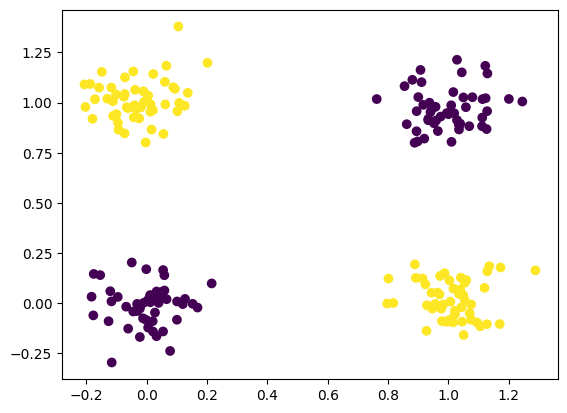

In [56]:
plt.scatter(X[:,0],X[:,1],c=y)

## Steps:
* build train and test sets
* write MLP class in Pytorch with two layers with adjustable number of perceptrons
* use nn.linear and nn.Sigmoid() units
* train your model
* test your model

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)


x_train = torch.FloatTensor(X_train)
x_test = torch.FloatTensor(X_test)
Y_train = torch.FloatTensor(y_train)
Y_test = torch.FloatTensor(y_test)

In [58]:
import torch
class Perceptron(torch.nn.Module): #all nets inherit from nn.Module
    def __init__(self): #define layer types
        super(Perceptron, self).__init__()
        self.fc = torch.nn.Linear(2,1,bias=False) # Perceptron is single neuron "fully connected" (fc) -> linear unit with 2 inputs and 1 output
        self.non_linear = torch.nn.Sigmoid() #non-linear activation
    def forward(self, x): #build network
        output = self.fc(x) #w*X
        output = self.non_linear(output) # activation
        return output

In [59]:
model1 = Perceptron()
criterion1 = torch.nn.BCELoss()
optimizer1 = torch.optim.SGD(model1.parameters(), lr = 0.01)

In [60]:
from sklearn.neural_network import MLPClassifier


clf = MLPClassifier(hidden_layer_sizes=(6,5),random_state=5,verbose=True,learning_rate_init=0.01)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

Iteration 1, loss = 0.71205406
Iteration 2, loss = 0.70246038
Iteration 3, loss = 0.69362467
Iteration 4, loss = 0.68701574
Iteration 5, loss = 0.68171512
Iteration 6, loss = 0.67658608
Iteration 7, loss = 0.67144270
Iteration 8, loss = 0.66627930
Iteration 9, loss = 0.66099542
Iteration 10, loss = 0.65564778
Iteration 11, loss = 0.65028480
Iteration 12, loss = 0.64494323
Iteration 13, loss = 0.63969030
Iteration 14, loss = 0.63439158
Iteration 15, loss = 0.62899971
Iteration 16, loss = 0.62364126
Iteration 17, loss = 0.61824783
Iteration 18, loss = 0.61266318
Iteration 19, loss = 0.60694407
Iteration 20, loss = 0.60112911
Iteration 21, loss = 0.59523766
Iteration 22, loss = 0.58915139
Iteration 23, loss = 0.58299268
Iteration 24, loss = 0.57693407
Iteration 25, loss = 0.57092944
Iteration 26, loss = 0.56492442
Iteration 27, loss = 0.55897452
Iteration 28, loss = 0.55297989
Iteration 29, loss = 0.54686261
Iteration 30, loss = 0.54061411
Iteration 31, loss = 0.53430487
Iteration 32, los

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [61]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

1.0